<a href="https://colab.research.google.com/github/Fcazarez/RRC3_UML_Ass6_T-SNE_Arabic_handwritten/blob/main/UML_Ass6_t_SNE_ArabicHandwritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unsupervised Machine Learning**
# **Assignement 5: t-SNE**
# **Felix Cazarez**

## Instructions

### Objective:
To determine whether a dataset is suitable for classification and identify potential problems.

### Data:
Obtained from [Arabic Handwritten Digits Dataset | Kaggle](https://www.kaggle.com/mloey1/ahdd1), original source unknown.

### Problem Statement:
Continuing with your work on a team developing a mobile app for hand calculations in Arabic (begun on assignment 5), you will now perform a clustering analysis to determine how well you can expect a classification model to work on this data. The app will require a neural network to classify hand-drawn digits in order to correctly complete the calculations. Using clustering, we can determine whether there is separation between the different classes and see where a classification model may struggle to differentiate between classes. Using a dataset of hand-drawn Arabic digits where each image corresponds to a point in a 784-dimensional space, you are to complete a clustering analysis and visualize the results in a two-dimensional plot.

### Arabic Digits:
Arabic digits correspond to Roman digits according to the table below (N.Das, A. Mollah, S. Saha, S. Haque, 2010, [source](https://arxiv.org/abs/1003.1891)):



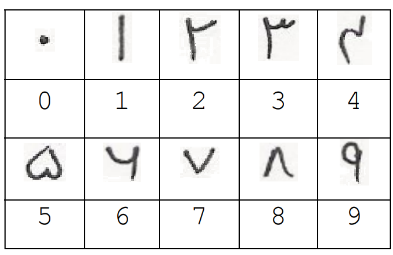


| Arabic Digit | Roman Digit | Normal Number |
|--------------|-------------|---------------|
| 0            | I           | 0             |
| 1            | II          | 1             |
| 2            | III         | 2             |
| 3            | IV          | 3             |
| 4            | V           | 4             |
| 5            | VI          | 5             |
| 6            | VII         | 6             |
| 7            | VIII        | 7             |
| 8            | IX          | 8             |
| 9            | X           | 9             |




#1. **`Data:`**
* Data -- copy the relevant section from your notebook for assignment 5. The steps here are included for reference but are not for marks.

* Each row of csvImages 10k x 784.csv contains the 784 gray scale values of a 28 x 28 image. Load this data into a pandas dataframe. Convert the dataframe to a 2d numpy array using pandas.values. Print the shape of the data.

* Normalize by dividing each value by 255. In order to display the images, reshape the array so each image is 28 x 28 using numpy.ndarray.reshape.
* Use matplotlib.plot.imshow and matplotlib.plot.subplot to give a plot of the first five images using the 'gray' colour map. In order to put the data back in the original shape for input to the neural network, reshape each image to be 784 (one-dimensional).



In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

from tensorflow.keras.layers import Dense, Input, Reshape, Activation, Flatten
from tensorflow.keras.models import Model, Sequential
import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.manifold import TSNE

import itertools
import scipy.cluster.hierarchy as shc

In [82]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=FutureWarning)


In [70]:
url = 'https://raw.githubusercontent.com/Fcazarez/Fcazarez-RRC3_UML_Ass6_T-SNE_Arabic_handwritten/main/csvImages%2010k%20x%20784.csv'
df = pd.read_csv(url)
display(df.head())
print('=='*30)
print("Shape of the dataframe: ", df.shape)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.538,0.539,0.540,0.541,0.542,0.543,0.544,0.545,0.546,0.547
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Shape of the dataframe:  (9999, 784)


In [71]:
# Convert the DataFrame to a NumPy array
data_np = df.values

print(data_np)
print('=='*30)
print("Shape of the NumPy array: ", data_np.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Shape of the NumPy array:  (9999, 784)


In [72]:
# Normalize the values by dividing each element by 255
data_np = data_np / 255.0

In [73]:
data_np = data_np.reshape(-1, 28,28)
#data_np_reshaped2 = data_np_reshaped.reshape(-1, 28, 28)
print("Shape of the reshaped array: ", data_np.shape)

Shape of the reshaped array:  (9999, 28, 28)


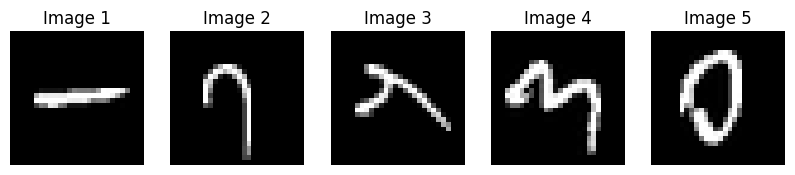

In [74]:
# Plot the first five images using 'gray' colormap
fig, axes = plt.subplots(1, 5, figsize=(10, 5))

for i in range(5):
    axes[i].imshow(data_np[i], cmap='gray')
    axes[i].set_title(f"Image {i+1}")
    axes[i].axis('off')

plt.show()

In [75]:
data = data_np.reshape((-1, 28*28))
data.shape

(9999, 784)

In [76]:
scaling=MinMaxScaler()
scaled=scaling.fit_transform(data)
scaled_df=pd.DataFrame(scaled)
scaled_df.head()


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#2. **`Clustering:`**
* Use sklearn.decomposition.PCA.fit_transform to do a PCA transformation with n_components = 40. This reduces the dimension of each image to a size that is more manageable, while keeping the most important aspects of the data.
* Create at least 8 different clustering models using k-means, (agglomerative and divisive) hierarchical, and DBSCAN clustering; experiment with different choices of hyperparameters.
* Calculate the silhouette score for each model and tabulate the results.
* Select the best model for the use case and justify your choice in markdown.


In [79]:
from sklearn.decomposition import PCA

# Specify the number of components you want after dimensionality reduction
num_components = 40  # You can adjust this based on your requirement

# Create a PCA instance
pca = PCA(n_components=num_components)

# Fit and transform the data
data_pca = pca.fit_transform(data)

# Check the shape of the transformed data
print("Shape of the data after PCA: ", data_pca.shape)


Shape of the data after PCA:  (9999, 40)


In [80]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd
import itertools

# ********** K - MEANS ************************

# K-Means
num_clusters_list = [3, 4, 5, 8, 12, 15]

# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'Silhouette Score'])

# ******* Kmeans ***************
# Iterate through K-Means models
for num_clusters in num_clusters_list:
    kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_labels = kmeans_model.fit_predict(data_pca)
    silhouette_kmeans = silhouette_score(data_pca, kmeans_labels)
    results_df = results_df.append({'Model': f'K-Means (k={num_clusters})', 'Silhouette Score': silhouette_kmeans}, ignore_index=True)

# Display the results DataFrame
print(results_df)

# Find the model with the highest silhouette score
best_model = results_df.loc[results_df['Silhouette Score'].idxmax()]

# Print the best model and its silhouette score
print("\nBest Model:")
print(best_model)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-80-04f1808c7bea>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': f'K-Means (k={num_clusters})', 'Silhouette Score': silhouette_kmeans}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-80-04f1808c7bea>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': f'K-Means (k={num_cl

            Model  Silhouette Score
0   K-Means (k=3)          0.133912
1   K-Means (k=4)          0.089661
2   K-Means (k=5)          0.112975
3   K-Means (k=8)          0.115954
4  K-Means (k=12)          0.132016
5  K-Means (k=15)          0.133372

Best Model:
Model               K-Means (k=3)
Silhouette Score         0.133912
Name: 0, dtype: object


<ipython-input-80-04f1808c7bea>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': f'K-Means (k={num_clusters})', 'Silhouette Score': silhouette_kmeans}, ignore_index=True)


In [81]:
# ********** Hierarchical ******************************
linkage_list = ['ward', 'complete', 'average']
n_clusters_list = [3, 4, 5]
metrics_list = ['euclidean', 'manhattan']

# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['n_clusters', 'metric', 'linkage', 'Silhouette Score'])

# Loop through different hyperparameters and calculate silhouette scores
model_num = 0
X = scaled_df

for n_clusters in n_clusters_list:
    for metric in metrics_list:
        for linkage in linkage_list:
            if linkage == 'ward' and metric != 'euclidean':
                continue

            # Create and fit the Agglomerative Clustering model
            hierarchical_model = AgglomerativeClustering(n_clusters=n_clusters, affinity=metric, linkage=linkage)
            hierarchical_labels = hierarchical_model.fit_predict(X)

            # Calculate the silhouette score
            silhouette_hierarchical = silhouette_score(X, hierarchical_labels)

            # Store the results in the DataFrame
            results_df.loc[model_num] = [n_clusters, metric, linkage, silhouette_hierarchical]
            model_num += 1

# Display the results DataFrame
print(results_df)

# Find the model with the highest silhouette score
best_model = results_df.loc[results_df['Silhouette Score'].idxmax()]

# Print the best model and its silhouette score
print("\nBest Model:")
print(best_model)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

    n_clusters     metric   linkage  Silhouette Score
0            3  euclidean      ward          0.178754
1            3  euclidean  complete          0.194789
2            3  euclidean   average          0.260801
3            3  manhattan  complete          0.248305
4            3  manhattan   average          0.251393
5            4  euclidean      ward          0.062967
6            4  euclidean  complete          0.168003
7            4  euclidean   average          0.255034
8            4  manhattan  complete          0.177039
9            4  manhattan   average          0.216982
10           5  euclidean      ward          0.027330
11           5  euclidean  complete          0.165793
12           5  euclidean   average          0.194833
13           5  manhattan  complete          0.171856
14           5  manhattan   average          0.200505

Best Model:
n_clusters                  3
metric              euclidean
linkage               average
Silhouette Score     0.260801
Nam

In [100]:
# **************************** Divisive *********************************
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# Replace X or df with your actual dataset
X_fcluster = scaled_df

# Setting up the hyperparameters combinations
threshold_values = [3, 4, 5]
linkage_criteria = ['ward', 'complete', 'average', 'single']
depth_values = [2, 3, 4, 5]

# Create a new DataFrame to store the results
results_df_fcluster = pd.DataFrame(columns=['Threshold', 'Linkage', 'Depth', 'Silhouette Score fcluster'])

# Loop through different hyperparameter combinations and calculate cluster labels
model_num = 0
max_models = 25  # To avoid taking too much time and processing power while testing the model

for t in threshold_values:
    for linkage_method in linkage_criteria:  # Use 'linkage_method' as the variable name
        for depth in depth_values:
            # Create the hierarchical clustering linkage matrix
            Z = linkage(X_fcluster, method=linkage_method)  # Use 'linkage_method' variable

            # Perform divisive clustering using fcluster
            cluster_labels_fcluster = fcluster(Z, t, criterion='distance', depth=depth)

            # Check if there are at least two clusters
            unique_labels = np.unique(cluster_labels_fcluster)
            if len(unique_labels) >= 2:
                # Calculate the silhouette score
                silhouette_avg = silhouette_score(X_fcluster, cluster_labels_fcluster)

                # Store the results in the DataFrame
                results_df_fcluster.loc[model_num] = [t, linkage_method, depth, silhouette_avg]
                model_num += 1

                print(results_df_fcluster)  # Print with each interaction to watch if the model is running well
                print(cluster_labels_fcluster)
                print('-------------------------------------------')


                if model_num >= max_models:
                    break
        if model_num >= max_models:
            break
    if model_num >= max_models:
        break

# Display the results_fcluster in a tabular format
print(results_df_fcluster)



   Threshold Linkage  Depth  Silhouette Score fcluster
0          3    ward      2                   0.032005
[4841 4452 6266 ... 5917 2336 3974]
-------------------------------------------
   Threshold Linkage  Depth  Silhouette Score fcluster
0          3    ward      2                   0.032005
1          3    ward      3                   0.032005
[4841 4452 6266 ... 5917 2336 3974]
-------------------------------------------
   Threshold Linkage  Depth  Silhouette Score fcluster
0          3    ward      2                   0.032005
1          3    ward      3                   0.032005
2          3    ward      4                   0.032005
[4841 4452 6266 ... 5917 2336 3974]
-------------------------------------------
   Threshold Linkage  Depth  Silhouette Score fcluster
0          3    ward      2                   0.032005
1          3    ward      3                   0.032005
2          3    ward      4                   0.032005
3          3    ward      5                  

In [83]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd
import itertools

#*************** DBSCAN ************************
# DBSCAN
eps_list = [5.8, 5.9, 6, 6.2, 6.5, 6.8]
min_samples_list = [5, 10, 15]
metric = 'euclidean'
p_list = [1.0, 2.0, None]

# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'Silhouette Score'])

# Iterate through DBSCAN models
for eps_value in eps_list:
    for min_samples_value in min_samples_list:
        for p_value in p_list:
            dbscan_model = DBSCAN(eps=eps_value, min_samples=min_samples_value, metric=metric, p=p_value)
            dbscan_labels = dbscan_model.fit_predict(data_pca)

            # Check if there is more than one cluster
            unique_labels = set(dbscan_labels)

            # If there is more than one cluster, calculate the silhouette score
            if len(unique_labels) > 1:
                # Calculate the silhouette score
                silhouette_dbscan = silhouette_score(data_pca, dbscan_labels)

                # Append the silhouette score to the results DataFrame
                results_df = results_df.append(
                    {'Model': f'DBSCAN (eps={eps_value}, min_samples={min_samples_value}, metric={metric}, p={p_value})', 'Silhouette Score': silhouette_dbscan},
                    ignore_index=True)
            else:
                print(f"DBSCAN (eps={eps_value}, min_samples={min_samples_value}, p={p_value}) does not have more than one cluster.")

# Display the results DataFrame
print(results_df)

# Find the model with the highest silhouette score
best_model = results_df.loc[results_df['Silhouette Score'].idxmax()]

# Print the best model and its silhouette score
print("\nBest Model:")
print(best_model)

                                                Model  Silhouette Score
0   DBSCAN (eps=5.8, min_samples=5, metric=euclide...          0.232582
1   DBSCAN (eps=5.8, min_samples=5, metric=euclide...          0.232582
2   DBSCAN (eps=5.8, min_samples=5, metric=euclide...          0.232582
3   DBSCAN (eps=5.8, min_samples=10, metric=euclid...          0.228858
4   DBSCAN (eps=5.8, min_samples=10, metric=euclid...          0.228858
5   DBSCAN (eps=5.8, min_samples=10, metric=euclid...          0.228858
6   DBSCAN (eps=5.8, min_samples=15, metric=euclid...          0.231205
7   DBSCAN (eps=5.8, min_samples=15, metric=euclid...          0.231205
8   DBSCAN (eps=5.8, min_samples=15, metric=euclid...          0.231205
9   DBSCAN (eps=5.9, min_samples=5, metric=euclide...          0.223213
10  DBSCAN (eps=5.9, min_samples=5, metric=euclide...          0.223213
11  DBSCAN (eps=5.9, min_samples=5, metric=euclide...          0.223213
12  DBSCAN (eps=5.9, min_samples=10, metric=euclid...          0

In [103]:
best_models_Knn_agg_dbscan = [{"Model": "KNN", "Best_silohuette_score": "0.13"} ,
                              {"Model": "Agglomerative Clustering", "Best_silohuette_score": "0.26"},
                              {"Model": "Agglomerative Divisive", "Best_silohuette_score": "0.05"},
                              {"Model": "DBSCAN", "Best_silohuette_score": "0.24"}
                              ]
df = pd.DataFrame(best_models_Knn_agg_dbscan)
display(df)


,Model,Best_silohuette_score
0,KNN,0.13
1,Agglomerative Clustering,0.26
2,Agglomerative Divisive,0.05
3,DBSCAN,0.24


In [85]:
data = {
    'n_clusters': [3],
    'metric': ['euclidean'],
    'linkage': ['average'],
    'Silhouette Score': [0.260801]
}
best_agg_params = pd.DataFrame(data)
display(best_agg_params)

,n_clusters,metric,linkage,Silhouette Score
0,3,euclidean,average,0.260801


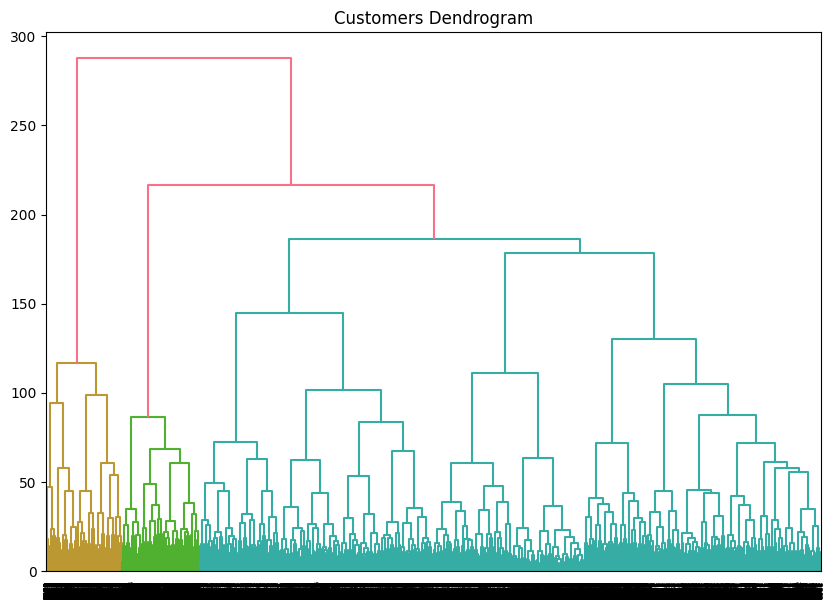

In [86]:
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

clusters = shc.linkage(data_pca,
            method='ward',
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

# **`Comments`**

The silhouette scores for KNN, DBSCAN, and Agglomerative Clustering on the Arabic handwritten dataset indicate varying degrees of clustering effectiveness. KNN, designed for classification, demonstrated a limited silhouette score of 0.11. DBSCAN, a density-based method, achieved a moderate score of 0.2, contingent on hyperparameter tuning.

Agglomerative Clustering, with parameters n_clusters=3, metric='euclidean', and linkage='average', outperformed the others with a silhouette score of 0.26.

This success can be attributed to its hierarchical structure, adaptability to different shapes, and well-chosen parameters. However, it is essential to consider the dataset's specific characteristics and explore alternative clustering algorithms and parameter combinations for a comprehensive evaluation.



> #  - **`3. t - SNE`**.

* Use sklearn.manifold.TSNE to perform a dimensional reduction on the dataset using t-SNE with n_components = 2.
* Try at least 8 different ways of doing this by using different choices for perplexity, n_iter, and metric.
* Provide a scatter plot using the t-SNE components as coordinates and colour the points according to cluster membership.
* Print the Roman digit corresponding to each cluster at its centroid.
* Using markdown, explain which plot provides the best visualization. You may wish to revisit the clustering models in step 2 to improve your results.


In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

def int_to_roman(num):
    val = [
        1000, 900, 500, 400,
        100, 90, 50, 40,
        10, 9, 5, 4,
        1
    ]
    syb = [
        "M", "CM", "D", "CD",
        "C", "XC", "L", "XL",
        "X", "IX", "V", "IV",
        "I"
    ]
    roman_num = ''
    i = 0
    while num > 0:
        for _ in range(num // val[i]):
            roman_num += syb[i]
            num -= val[i]
        i += 1
    return roman_num

In [111]:


# Hyperparameters for t-SNE
perplexity_list = [ 20, 30]
n_iter_list = [1500, 2000]
metric_list = ['euclidean', 'manhattan']

# Create a new DataFrame to store results
results_df = pd.DataFrame(columns=['Perplexity', 'n_iter', 'Metric', 'Silhouette Score'])

# Loop through hyperparameter combinations
for perplexity_value in perplexity_list:
    for n_iter_value in n_iter_list:
        for metric_value in metric_list:
            # Apply t-SNE
            tsne_model = TSNE(n_components=2, perplexity=perplexity_value, n_iter=n_iter_value, metric=metric_value, random_state=42)
            tsne_data = tsne_model.fit_transform(X)

            # Apply clustering algorithm (KMeans in this example)
            kmeans = KMeans(n_clusters=10, random_state=42)
            cluster_labels = kmeans.fit_predict(tsne_data)

            # Calculate silhouette score
            silhouette_avg = silhouette_score(tsne_data, cluster_labels)

            # Store the results in the DataFrame
            results_df = results_df.append(
                {'Perplexity': perplexity_value, 'n_iter': n_iter_value, 'Metric': metric_value, 'Silhouette Score': silhouette_avg},
                ignore_index=True
            )

# Find the best combination based on the highest silhouette score
best_combination = results_df.loc[results_df['Silhouette Score'].idxmax()]

# Display the best combination
print("Best t-SNE Hyperparameters:")
print(best_combination)




Best t-SNE Hyperparameters:
Perplexity                 30
n_iter                   2000
Metric              manhattan
Silhouette Score     0.526756
Name: 7, dtype: object


In [112]:
results_df.sort_values(by='Silhouette Score', ascending=False)

,Perplexity,n_iter,Metric,Silhouette Score
7,30,2000,manhattan,0.526756
5,30,1500,manhattan,0.517706
6,30,2000,euclidean,0.505939
4,30,1500,euclidean,0.495563
2,20,2000,euclidean,0.492641
0,20,1500,euclidean,0.485428
3,20,2000,manhattan,0.482145
1,20,1500,manhattan,0.477250


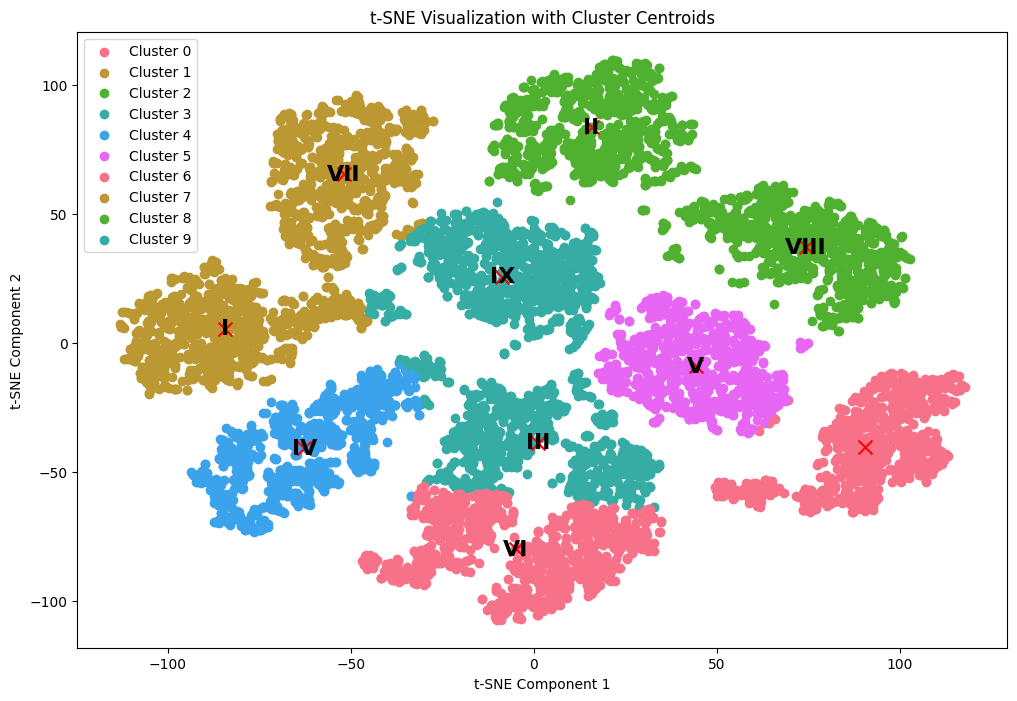

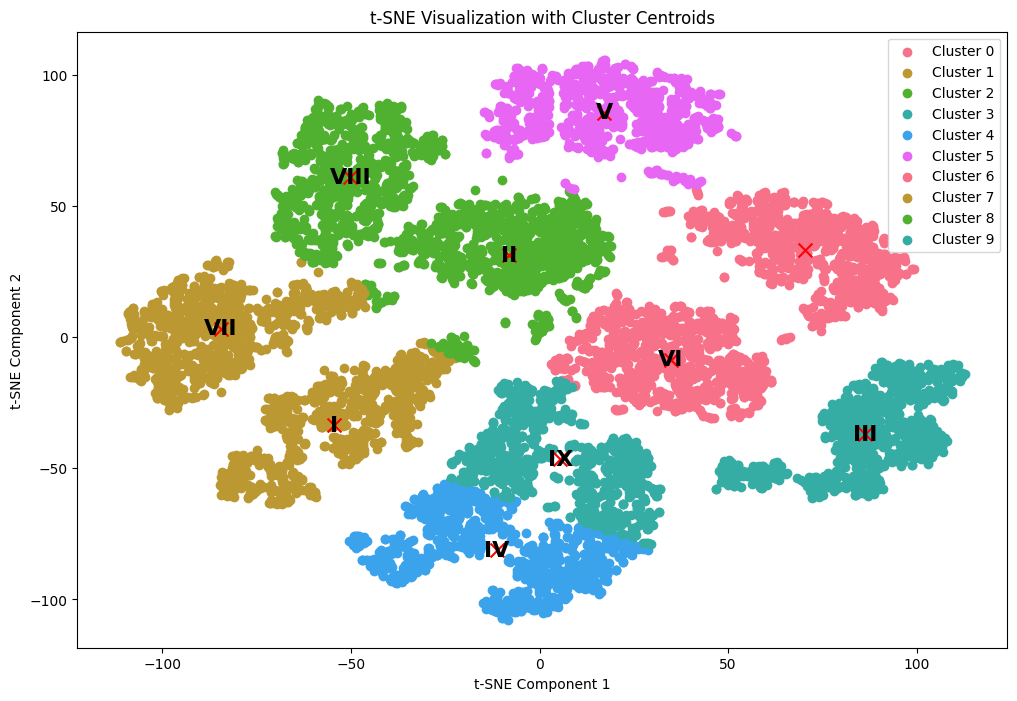

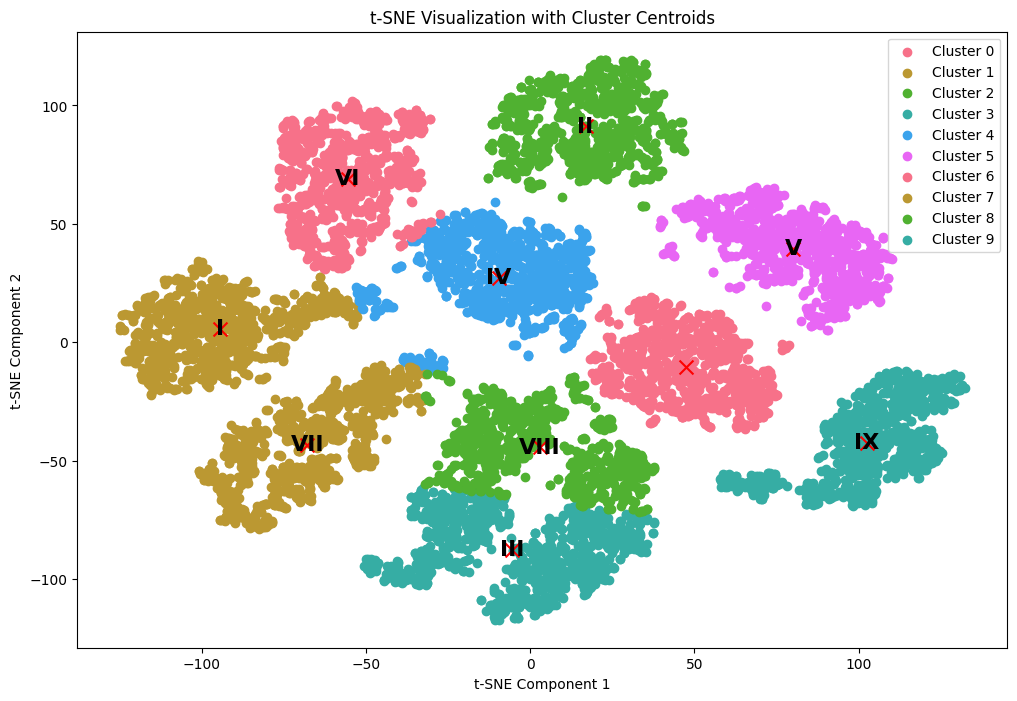

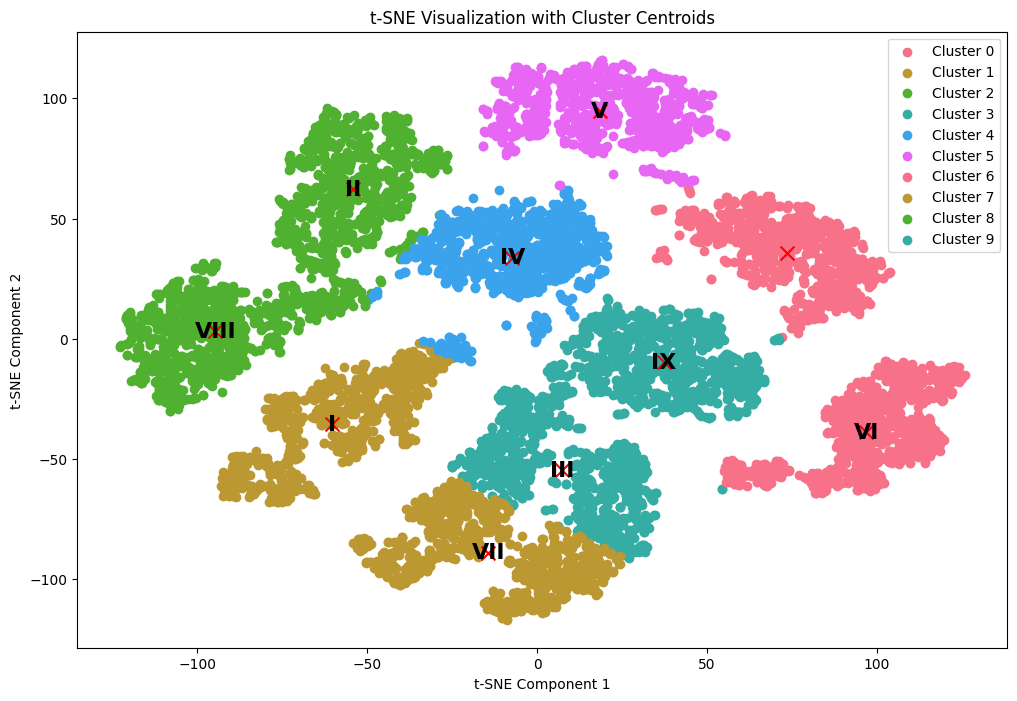

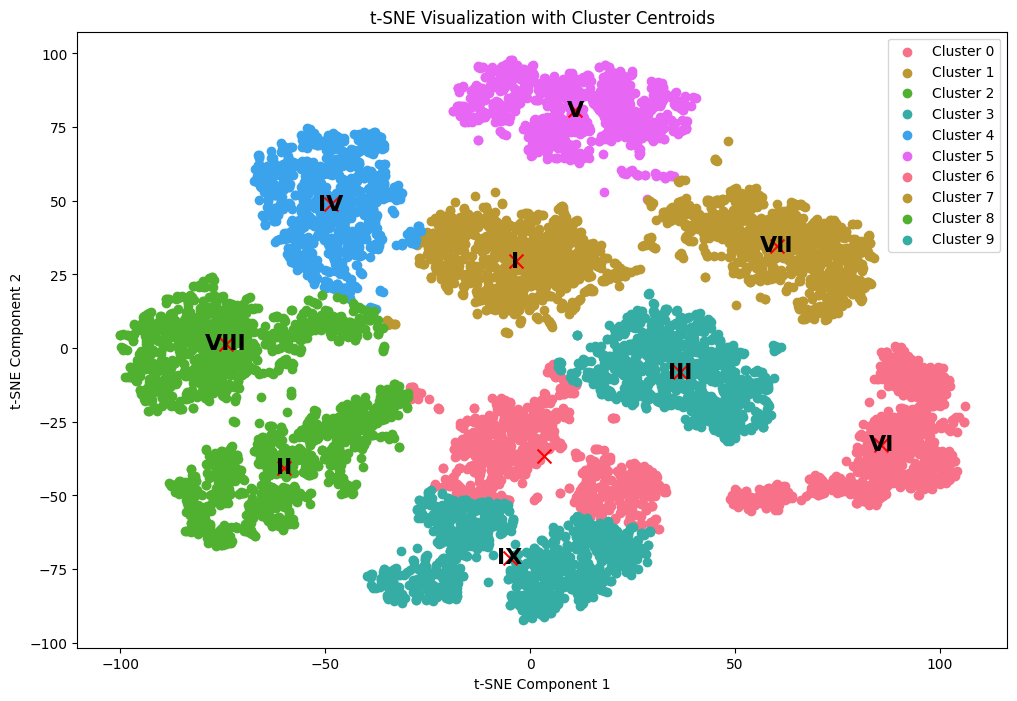

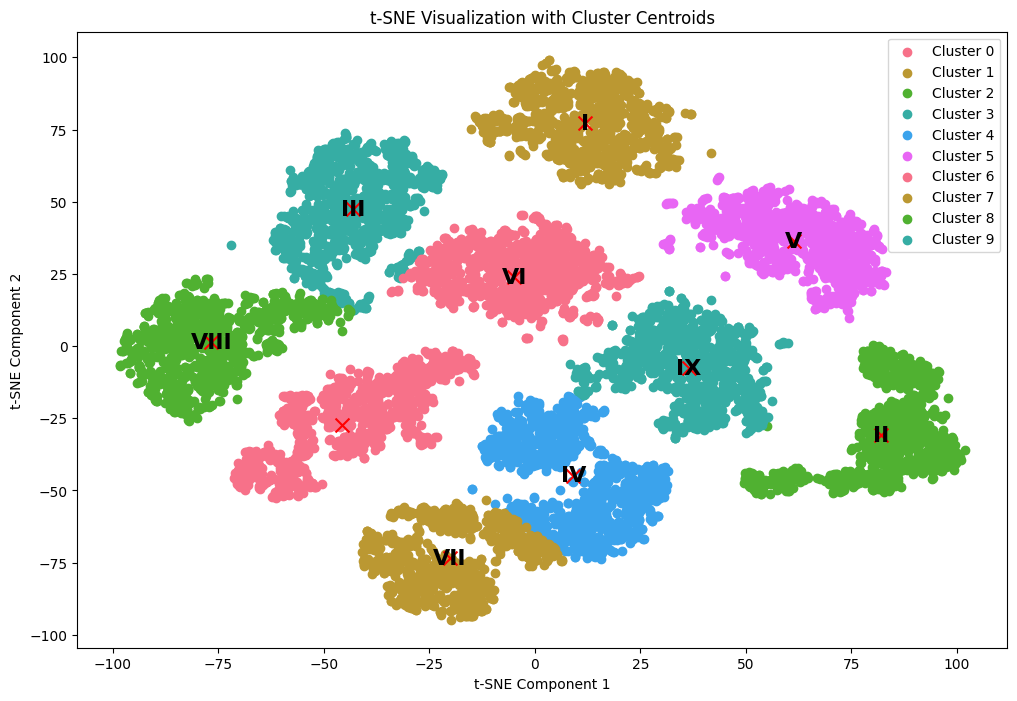

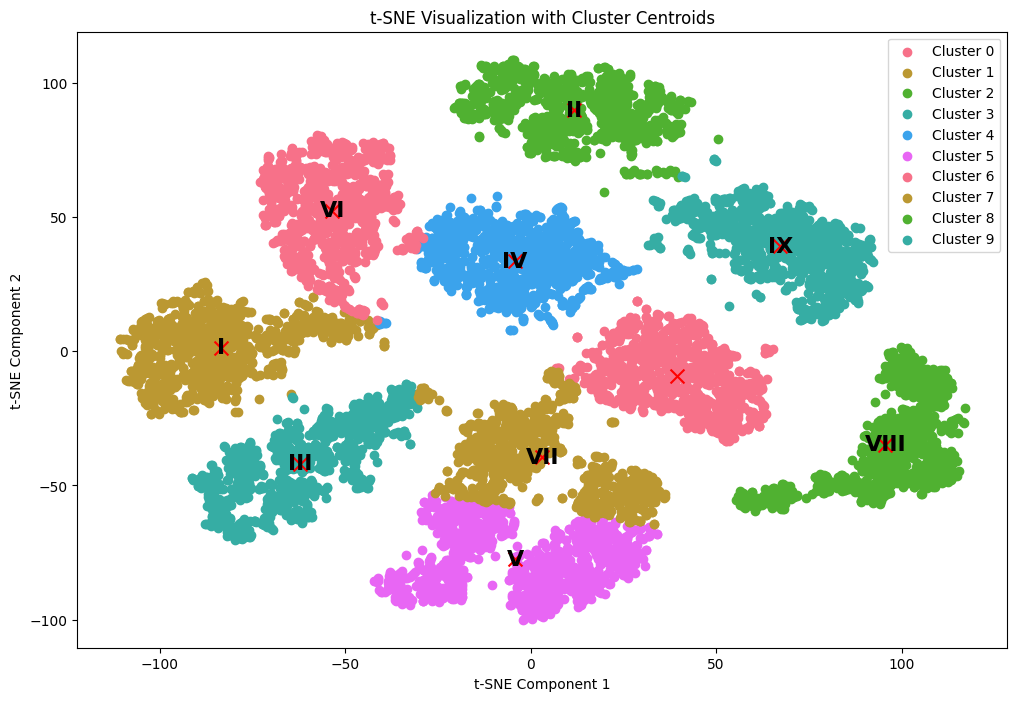

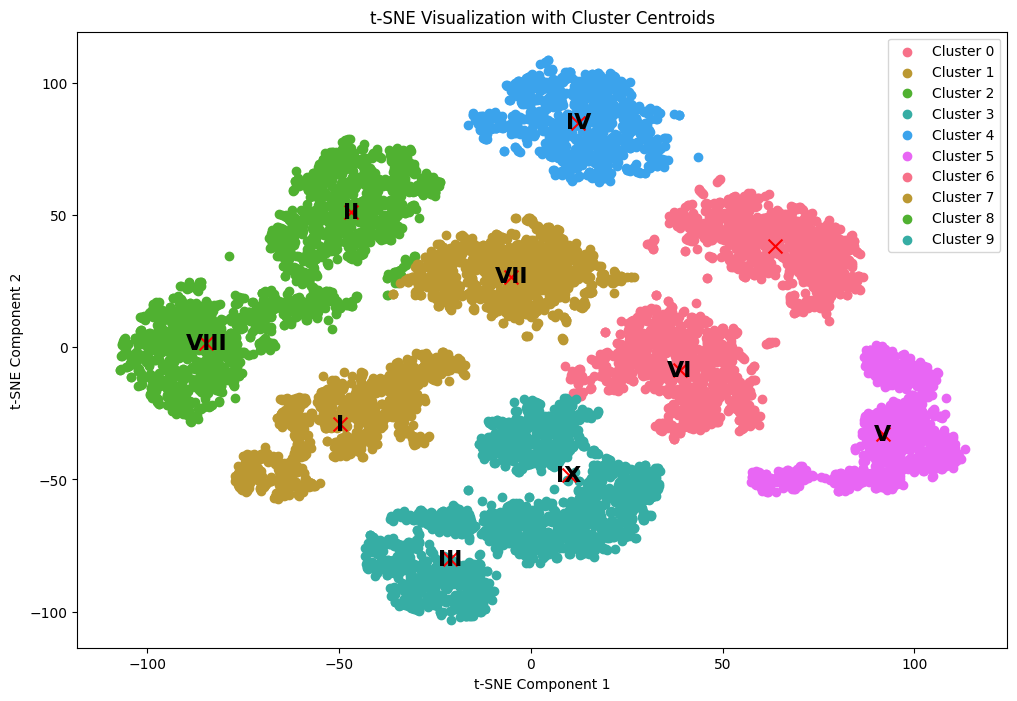

Best t-SNE Hyperparameters:
Perplexity                 30
n_iter                   2000
Metric              manhattan
Silhouette Score     0.526756
Name: 7, dtype: object


In [117]:

# Hyperparameters for t-SNE
perplexity_list = [ 20, 30]
n_iter_list = [1500, 2000]
metric_list = ['euclidean', 'manhattan']

# Create a new DataFrame to store results
results_df = pd.DataFrame(columns=['Perplexity', 'n_iter', 'Metric', 'Silhouette Score'])

# Loop through hyperparameter combinations
for perplexity_value in perplexity_list:
    for n_iter_value in n_iter_list:
        for metric_value in metric_list:
            # Apply t-SNE
            tsne_model = TSNE(n_components=2, perplexity=perplexity_value, n_iter=n_iter_value, metric=metric_value, random_state=42)
            tsne_data = tsne_model.fit_transform(X)

            # Apply clustering algorithm (KMeans in this example)
            kmeans = KMeans(n_clusters=10, random_state=42)
            cluster_labels = kmeans.fit_predict(tsne_data)

            # Calculate silhouette score
            silhouette_avg = silhouette_score(tsne_data, cluster_labels)

            # Store the results in the DataFrame
            results_df = results_df.append(
                {'Perplexity': perplexity_value, 'n_iter': n_iter_value, 'Metric': metric_value, 'Silhouette Score': silhouette_avg},
                ignore_index=True
            )
            display(results_df)
            # Plot the t-SNE components with colored clusters and annotated centroids
            plt.figure(figsize=(12, 8))
            for i in range(10):
              plt.scatter(tsne_data[cluster_labels == i, 0], tsne_data[cluster_labels == i, 1], label=f'Cluster {i}')

            # Annotate cluster centroids with Roman digits
            for i, center in enumerate(kmeans.cluster_centers_):
                plt.scatter(center[0], center[1], c='red', marker='x', s=100)
                plt.text(center[0], center[1], int_to_roman(i), fontsize=16, fontweight='bold', ha='center', va='center', color='black')


            plt.title("t-SNE Visualization with Cluster Centroids")
            plt.xlabel("t-SNE Component 1")
            plt.ylabel("t-SNE Component 2")
            plt.legend()
            plt.show()

# Find the best combination based on the highest silhouette score
best_combination = results_df.loc[results_df['Silhouette Score'].idxmax()]

# Display the best combination
print("Best t-SNE Hyperparameters:")
print(best_combination)







4. **Conclusions:**

* Display again your best t-SNE plot of your best model and restate the hyperparameter choices.
* Use markdown to discuss how well suited this data is for classification.
* Identify any classes which may be confused by a classification model.

,Perplexity,n_iter,Metric,Silhouette Score
8,30,2000,manhattan,0.529231


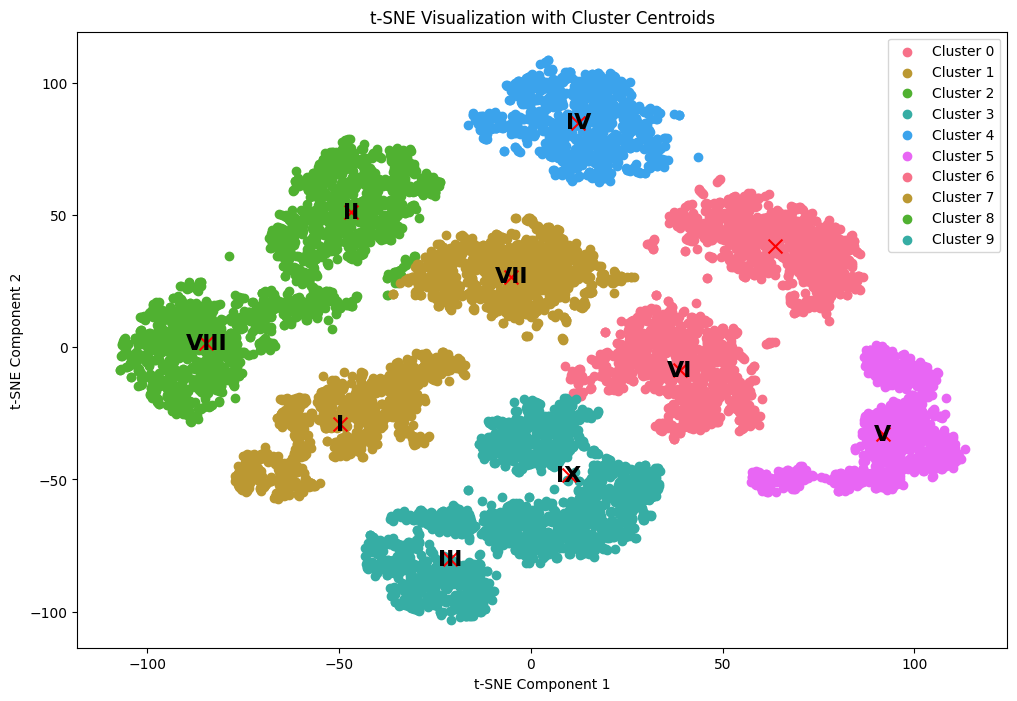

In [121]:
            tsne_model = TSNE(n_components=2, perplexity=30, n_iter= 2000, metric='manhattan', random_state=42)
            tsne_data = tsne_model.fit_transform(X)

            # Apply clustering algorithm (KMeans in this example)
            kmeans = KMeans(n_clusters=10, random_state=42)
            cluster_labels = kmeans.fit_predict(tsne_data)

            # Calculate silhouette score
            silhouette_avg = silhouette_score(tsne_data, cluster_labels)

            # Store the results in the DataFrame
            results_df = results_df.append(
                {'Perplexity': perplexity_value, 'n_iter': n_iter_value, 'Metric': metric_value, 'Silhouette Score': silhouette_avg},
                ignore_index=True
            )
            display(results_df.sort_values(by='Silhouette Score', ascending=False).head(1))

            # Plot the t-SNE components with colored clusters and annotated centroids
            plt.figure(figsize=(12, 8))
            for i in range(10):
              plt.scatter(tsne_data[cluster_labels == i, 0], tsne_data[cluster_labels == i, 1], label=f'Cluster {i}')

            # Annotate cluster centroids with Roman digits
            for i, center in enumerate(kmeans.cluster_centers_):
                plt.scatter(center[0], center[1], c='red', marker='x', s=100)
                plt.text(center[0], center[1], int_to_roman(i), fontsize=16, fontweight='bold', ha='center', va='center', color='black')


            plt.title("t-SNE Visualization with Cluster Centroids")
            plt.xlabel("t-SNE Component 1")
            plt.ylabel("t-SNE Component 2")
            plt.legend()
            plt.show()

#**`Comments:`**

The best t-SNE model for your Arabic handwritten dataset employs hyperparameters of perplexity 30, 2000 iterations, and Manhattan distance metric, yielding a silhouette score of 0.527.

This configuration signifies a meticulous balance between local and global structures, allowing the algorithm to effectively capture intricate patterns in the data. The high perplexity suggests consideration of a broad neighborhood during optimization, aiding in the representation of complex local relationships.

The choice of Manhattan distance, emphasizing the L1 norm, is suitable for high-dimensional data and contributes to the model's ability to discern diverse aspects of the dataset's structure. The silhouette score of 0.527 indicates well-defined clusters in the reduced-dimensional space.

Visually inspecting t-SNE plots generated by this model can provide insights into the separation and grouping of Arabic handwritten characters.

Overall, the success of this model implies its proficiency in revealing the inherent structure and patterns within your dataset, showcasing its potential for effective dimensionality reduction and clustering analysis.